In [77]:
import pandas as pd
import numpy as np

In [79]:
df = pd.read_csv("titanic_toy.csv")

In [81]:
df.sample(5)

,Age,Fare,Family,Survived
353,25.0,17.8000,1,0
587,60.0,79.2000,2,1
335,NaN,7.8958,0,0
109,NaN,24.1500,1,1
631,51.0,7.0542,0,0


In [83]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [85]:
from sklearn.model_selection  import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.iloc[:,0:3] , df.iloc[:,-1], test_size=0.2 , random_state = 42)
x_train

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6
...,...,...,...
106,21.0,7.6500,0
270,NaN,31.0000,0
860,41.0,NaN,2
435,14.0,120.0000,3


In [87]:
x_train['age_99'] = x_train['Age'].fillna(99)
x_train['age_minus'] = x_train['Age'].fillna(-1)
x_train['fare_99'] = x_train['Fare'].fillna(999)
x_train['fare_minus'] = x_train['Fare'].fillna(-1)

In [89]:
x_train

,Age,Fare,Family,age_99,age_minus,fare_99,fare_minus
331,45.5,28.5000,0,45.5,45.5,28.5000,28.5000
733,23.0,13.0000,0,23.0,23.0,13.0000,13.0000
382,32.0,7.9250,0,32.0,32.0,7.9250,7.9250
704,26.0,7.8542,1,26.0,26.0,7.8542,7.8542
813,6.0,31.2750,6,6.0,6.0,31.2750,31.2750
...,...,...,...,...,...,...,...
106,21.0,7.6500,0,21.0,21.0,7.6500,7.6500
270,NaN,31.0000,0,99.0,-1.0,31.0000,31.0000
860,41.0,NaN,2,41.0,41.0,999.0000,-1.0000
435,14.0,120.0000,3,14.0,14.0,120.0000,120.0000


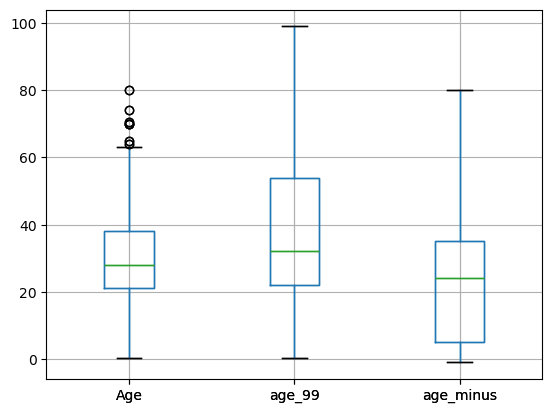

In [93]:
import matplotlib.pyplot as plt 
x_train[['Age' , 'age_99' , 'age_minus']].boxplot()
plt.show()

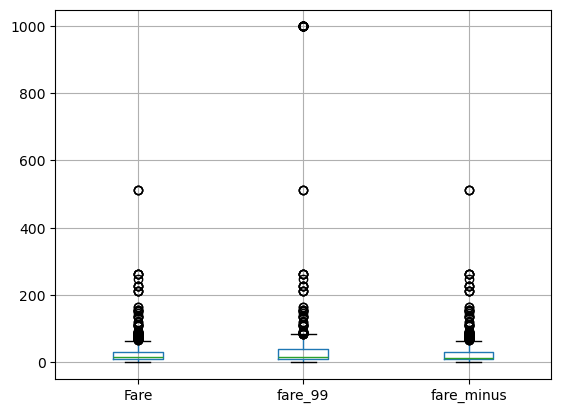

In [95]:
import matplotlib.pyplot as plt 
x_train[['Fare' , 'fare_99' , 'fare_minus']].boxplot()
plt.show()

In [97]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 

In [99]:
X_train , X_test , Y_train , Y_test = train_test_split(df.iloc[:,0:3] , df.iloc[:,-1], test_size=0.2 , random_state = 42)

In [101]:
trf = ColumnTransformer(
    [("imputer1" , SimpleImputer(strategy='constant' , fill_value = 99 ) ,['Age']),
      ("imputer2" , SimpleImputer(strategy='constant' , fill_value = 999) , ['Fare'])],
    remainder = 'passthrough')

In [103]:
x_train_new = trf.fit_transform(X_train)

In [105]:
x_test_new = trf.transform(X_test)

In [107]:
x_train_new

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    , 999.    ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])

In [109]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [111]:
trf.named_transformers_['imputer2'].statistics_

array([999.])